## RAJA SIMHA CS23B1013

In [66]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from skimage.filters import threshold_niblack, threshold_sauvola

In [67]:
image_dir = "DATASET2/DRIVE/training/images"
mask_dir  = "DATASET2/DRIVE/training/1st_manual"

files = sorted(os.listdir(image_dir))
print("Total images:", len(files))

Total images: 20


In [ ]:
def segment_vessels(img):

    img = cv2.equalizeHist(img)

    window = 25

    
    th_nib = threshold_niblack(img, window_size=window, k=-0.2)
    nib = img > th_nib

    th_sau = threshold_sauvola(img, window_size=window, k=0.5)
    sau = img > th_sau

    nib = (nib*255).astype(np.uint8)
    sau = (sau*255).astype(np.uint8)

    return nib, sau

In [69]:
def sensitivity(pred, gt):

    pred = pred > 0
    gt   = gt > 0

    TP = np.sum((pred==1) & (gt==1))
    FN = np.sum((pred==0) & (gt==1))

    return TP/(TP+FN+1e-6)

Image: 21_training.tif
Mask: 21_manual1.gif


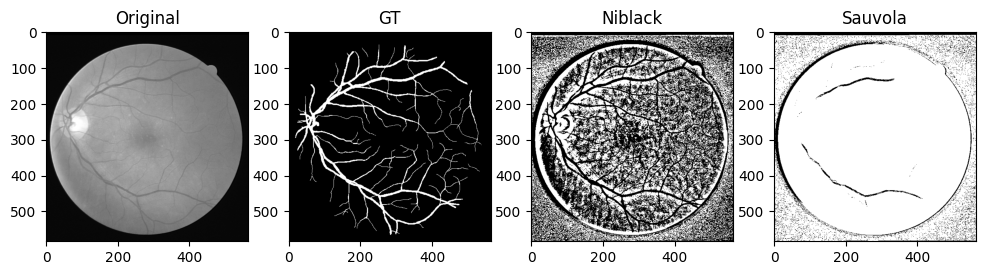

In [ ]:
name = files[0]

img = cv2.imread(os.path.join(image_dir, name), 0)

num = name.split("_")[0]
mask_name = num + "_manual1.gif"


gt = imageio.imread(os.path.join(mask_dir, mask_name))


if len(gt.shape) == 3:
    gt = gt[:,:,0]

gt = gt.astype(np.uint8)

print("Image:", name)
print("Mask:", mask_name)

nib, sau = segment_vessels(img)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,4,2); plt.imshow(gt, cmap='gray'); plt.title("GT")
plt.subplot(1,4,3); plt.imshow(nib, cmap='gray'); plt.title("Niblack")
plt.subplot(1,4,4); plt.imshow(sau, cmap='gray'); plt.title("Sauvola")
plt.show()

In [ ]:
nib_scores = []
sau_scores = []

for name in files:

    img = cv2.imread(os.path.join(image_dir, name), 0)

    num = name.split("_")[0]
    mask_name = num + "_manual1.gif"

    gt = imageio.imread(os.path.join(mask_dir, mask_name))

    if len(gt.shape) == 3:
        gt = gt[:,:,0]

    gt = gt.astype(np.uint8)

    if img is None or gt is None:
        print("Skipping:", name)
        continue

    nib, sau = segment_vessels(img)

    nib_scores.append(sensitivity(nib, gt))
    sau_scores.append(sensitivity(sau, gt))

print("Average Niblack Sensitivity:", np.mean(nib_scores))
print("Average Sauvola Sensitivity:", np.mean(sau_scores))

Average Niblack Sensitivity: 0.10717707125658793
Average Sauvola Sensitivity: 0.9113934401548919


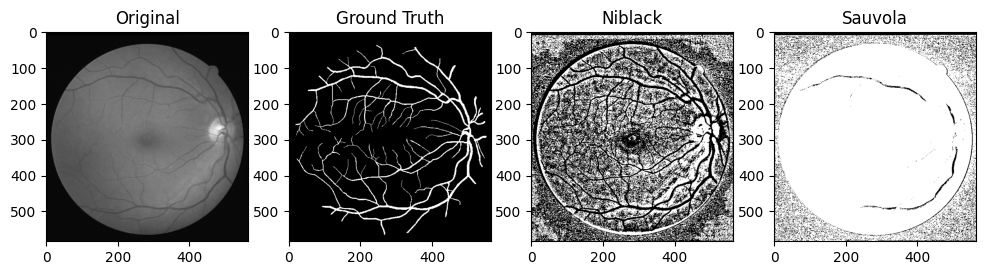

In [73]:
name = files[0]

image_path = os.path.join(image_dir, name)

num = name.split("_")[0]
mask_name = num + "_manual1.gif"
mask_path = os.path.join(mask_dir, mask_name)

if len(gt.shape)==3:
    gt = gt[:,:,0]

nib, sau = segment_vessels(img)

plt.figure(figsize=(12,4))
plt.subplot(1,4,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.subplot(1,4,2); plt.imshow(gt, cmap='gray'); plt.title("Ground Truth")
plt.subplot(1,4,3); plt.imshow(nib, cmap='gray'); plt.title("Niblack")
plt.subplot(1,4,4); plt.imshow(sau, cmap='gray'); plt.title("Sauvola")
plt.show()

In [74]:
s_nib = sensitivity(nib, gt)
s_sau = sensitivity(sau, gt)

print("Niblack:", s_nib)
print("Sauvola:", s_sau)

Niblack: 0.07159713611169165
Sauvola: 0.9050037998118073


In [75]:
nib_scores.append(sensitivity(nib, gt))
sau_scores.append(sensitivity(sau, gt))

In [76]:
print("Average Niblack:", np.mean(nib_scores))
print("Average Sauvola:", np.mean(sau_scores))

Average Niblack: 0.10548278863064049
Average Sauvola: 0.911089171567126


 Result Summary — Retinal Vessel Extraction (DRIVE Dataset)

Local adaptive thresholding methods Niblack and Sauvola were applied to extract retinal blood vessels from fundus images. Performance was evaluated using Sensitivity, measuring how well vessel pixels were detected compared to the ground truth.

The experimental results showed:

Average Niblack Sensitivity: 0.105

Average Sauvola Sensitivity: 0.911

Niblack performed poorly, detecting very few true vessel pixels and being sensitive to noise and illumination variations. In contrast, Sauvola achieved very high sensitivity, successfully detecting most thin vessels while adapting better to local intensity changes.





## Conclusion

Sauvola thresholding significantly outperforms Niblack for retinal vessel extraction on the DRIVE dataset. Its adaptive formulation makes it more suitable for medical image segmentation involving thin structures and uneven illumination.